In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cdc_df = pd.read_sas('LLCP2021.XPT')

c:\Users\LTabl\Anaconda3\envs\PythonData\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [3]:
cdc_df.shape

(438693, 303)

In [4]:
#cdc_df.columns.tolist()

In [10]:
diet_df=cdc_df.copy()

In [11]:
diet_df=diet_df[['_AGE80',
'_BMI5CAT',
'_EDUCAG',
'_INCOMG1',
'_HLTHPLN',
'MARITAL',
'_RACE',
'_SEX',
'_STATE',
'EMPLOY1',
'ADDEPEV3',
'DIABETE4',
'DIABAGE3',
'_RFHLTH',
'INSULIN1',
'_MENT14D',
'_PHYS14D',
'PREDIAB1',
'BPMEDS',
'_CHOLCH3',
'CHOLMED3',
'_RFCHOL3',
'CVDSTRK3',
'_MICHD',
'_RFHYPE6',
'_TOTINDA',
'DIFFDRES',
'DIFFWALK',
'_FRTLT1A',
'_VEGLT1A',
'FRNCHDA_',
'FRUTDA2_',
'GRENDA1_',
'FTJUDA2_',
'POTADA1_',
'VEGEDA2_',
'WTCHSALT'
]]

In [12]:
diet_df.shape

(438693, 37)

In [14]:
diet_df = diet_df.rename(columns={'_AGE80' : 'AGE',
'_BMI5CAT' : 'BMI',
'_EDUCAG' : 'EDUCATION',
'_INCOMG1' : 'INCOME',
'_HLTHPLN' : 'INSURANCE',
'MARITAL' : 'MARITAL_STATUS',
'_RACE' : 'RACE',
'_SEX' : 'SEX',
'_STATE' : 'STATE',
'EMPLOY1' : 'WORK_STATUS',
'ADDEPEV3' : 'DEPRESSION',
'DIABETE4' : 'DIABETES',
'DIABAGE3' : 'DIABETES_AGE',
'_RFHLTH' : 'GENERAL_HEALTH',
'INSULIN1' : 'INSULIN',
'_MENT14D' : 'MENTAL_HEALTH',
'_PHYS14D' : 'PHYSICAL_HEALTH',
'PREDIAB1' : 'PREDIABETES',
'BPMEDS' : 'BPMEDS',
'_CHOLCH3' : 'CHOL_CHKD',
'CHOLMED3' : 'CHOL_MEDS',
'_RFCHOL3' : 'CHOLESTEROL',
'CVDSTRK3' : 'HEART_STROKE',
'_MICHD' : 'HRT_ATTK_OR_DISEASE',
'_RFHYPE6' : 'HYPERTENSION',
'_TOTINDA' : 'ANY_EXERCISE',
'DIFFDRES' : 'DIFFDRES',
'DIFFWALK' : 'DIFFWALK',
'_FRTLT1A' : 'ATE_FRUIT',
'_VEGLT1A' : 'ATE_VEGGIES',
'FRNCHDA_' : 'FRIES',
'FRUTDA2_' : 'FRUIT',
'GRENDA1_' : 'GREENS',
'FTJUDA2_' : 'JUICE',
'POTADA1_' : 'POTATOES',
'VEGEDA2_' : 'VEGETABLES',
'WTCHSALT' : 'WTCHSALT'})

In [15]:
diet_df.head()

,AGE,BMI,EDUCATION,INCOME,INSURANCE,MARITAL_STATUS,RACE,SEX,STATE,WORK_STATUS,...,DIFFWALK,ATE_FRUIT,ATE_VEGGIES,FRIES,FRUIT,GREENS,JUICE,POTATOES,VEGETABLES,WTCHSALT
0,70.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,7.0,...,2.0,1.0,1.0,4.300000e+01,100.0,5.700000e+01,5.397605e-79,14.0,100.0,NaN
1,67.0,NaN,4.0,9.0,1.0,9.0,2.0,2.0,1.0,8.0,...,1.0,1.0,1.0,5.397605e-79,100.0,1.400000e+01,5.397605e-79,14.0,100.0,NaN
2,72.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,7.0,...,2.0,1.0,2.0,1.400000e+01,100.0,5.397605e-79,5.397605e-79,14.0,43.0,NaN
3,62.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,7.0,...,2.0,1.0,1.0,5.700000e+01,43.0,1.000000e+01,7.100000e+01,27.0,71.0,NaN
4,76.0,3.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,8.0,...,1.0,1.0,1.0,2.900000e+01,100.0,1.000000e+02,5.397605e-79,29.0,100.0,NaN


In [16]:
diet_df.isnull().sum()

AGE                         0
BMI                     46852
EDUCATION                   0
INCOME                      0
INSURANCE                   0
MARITAL_STATUS              5
RACE                        0
SEX                         0
STATE                       0
WORK_STATUS              3588
DEPRESSION                  3
DIABETES                    3
DIABETES_AGE           381078
GENERAL_HEALTH              0
INSULIN                416455
MENTAL_HEALTH               0
PHYSICAL_HEALTH             0
PREDIABETES            324076
BPMEDS                 266560
CHOL_CHKD                   0
CHOL_MEDS               61571
CHOLESTEROL             61151
HEART_STROKE                2
HRT_ATTK_OR_DISEASE      4635
HYPERTENSION                0
ANY_EXERCISE                0
DIFFDRES                18786
DIFFWALK                18009
ATE_FRUIT                   0
ATE_VEGGIES                 0
FRIES                   44765
FRUIT                   43951
GREENS                  44250
JUICE     

CHOL_MEDS          0.19
DIABETES           0.16
DIFFWALK           0.14
HEART_STROKE       0.10
INSULIN            0.09
BPMEDS             0.07
PREDIABETES        0.07
WTCHSALT           0.07
SEX                0.07
INCOME             0.06
EDUCATION          0.06
DIFFDRES           0.06
CHOL_CHKD          0.05
MARITAL_STATUS     0.04
RACE               0.03
DEPRESSION         0.02
INSURANCE          0.01
ATE_FRUIT          0.00
VEGETABLES         0.00
GREENS             0.00
FRUIT              0.00
FRIES              0.00
ATE_VEGGIES       -0.00
STATE             -0.00
POTATOES          -0.01
JUICE             -0.01
MENTAL_HEALTH     -0.02
BMI               -0.05
DIABETES_AGE      -0.05
ANY_EXERCISE      -0.08
CHOLESTEROL       -0.10
PHYSICAL_HEALTH   -0.11
HYPERTENSION      -0.15
GENERAL_HEALTH    -0.16
WORK_STATUS       -0.20
AGE               -0.22
dtype: float64


<AxesSubplot:>

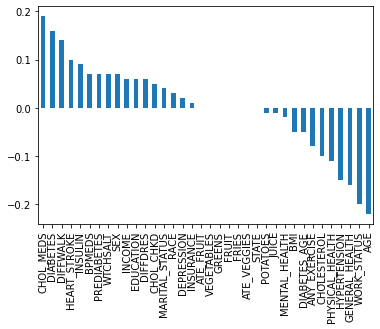

In [17]:
#Corr with HEART_STROKE
print(round(diet_df.corrwith(diet_df['HRT_ATTK_OR_DISEASE']),2).sort_values(ascending=False).drop('HRT_ATTK_OR_DISEASE'))
round(diet_df.corrwith(diet_df['HRT_ATTK_OR_DISEASE']),2).sort_values(ascending=False).drop('HRT_ATTK_OR_DISEASE').plot(kind='bar')

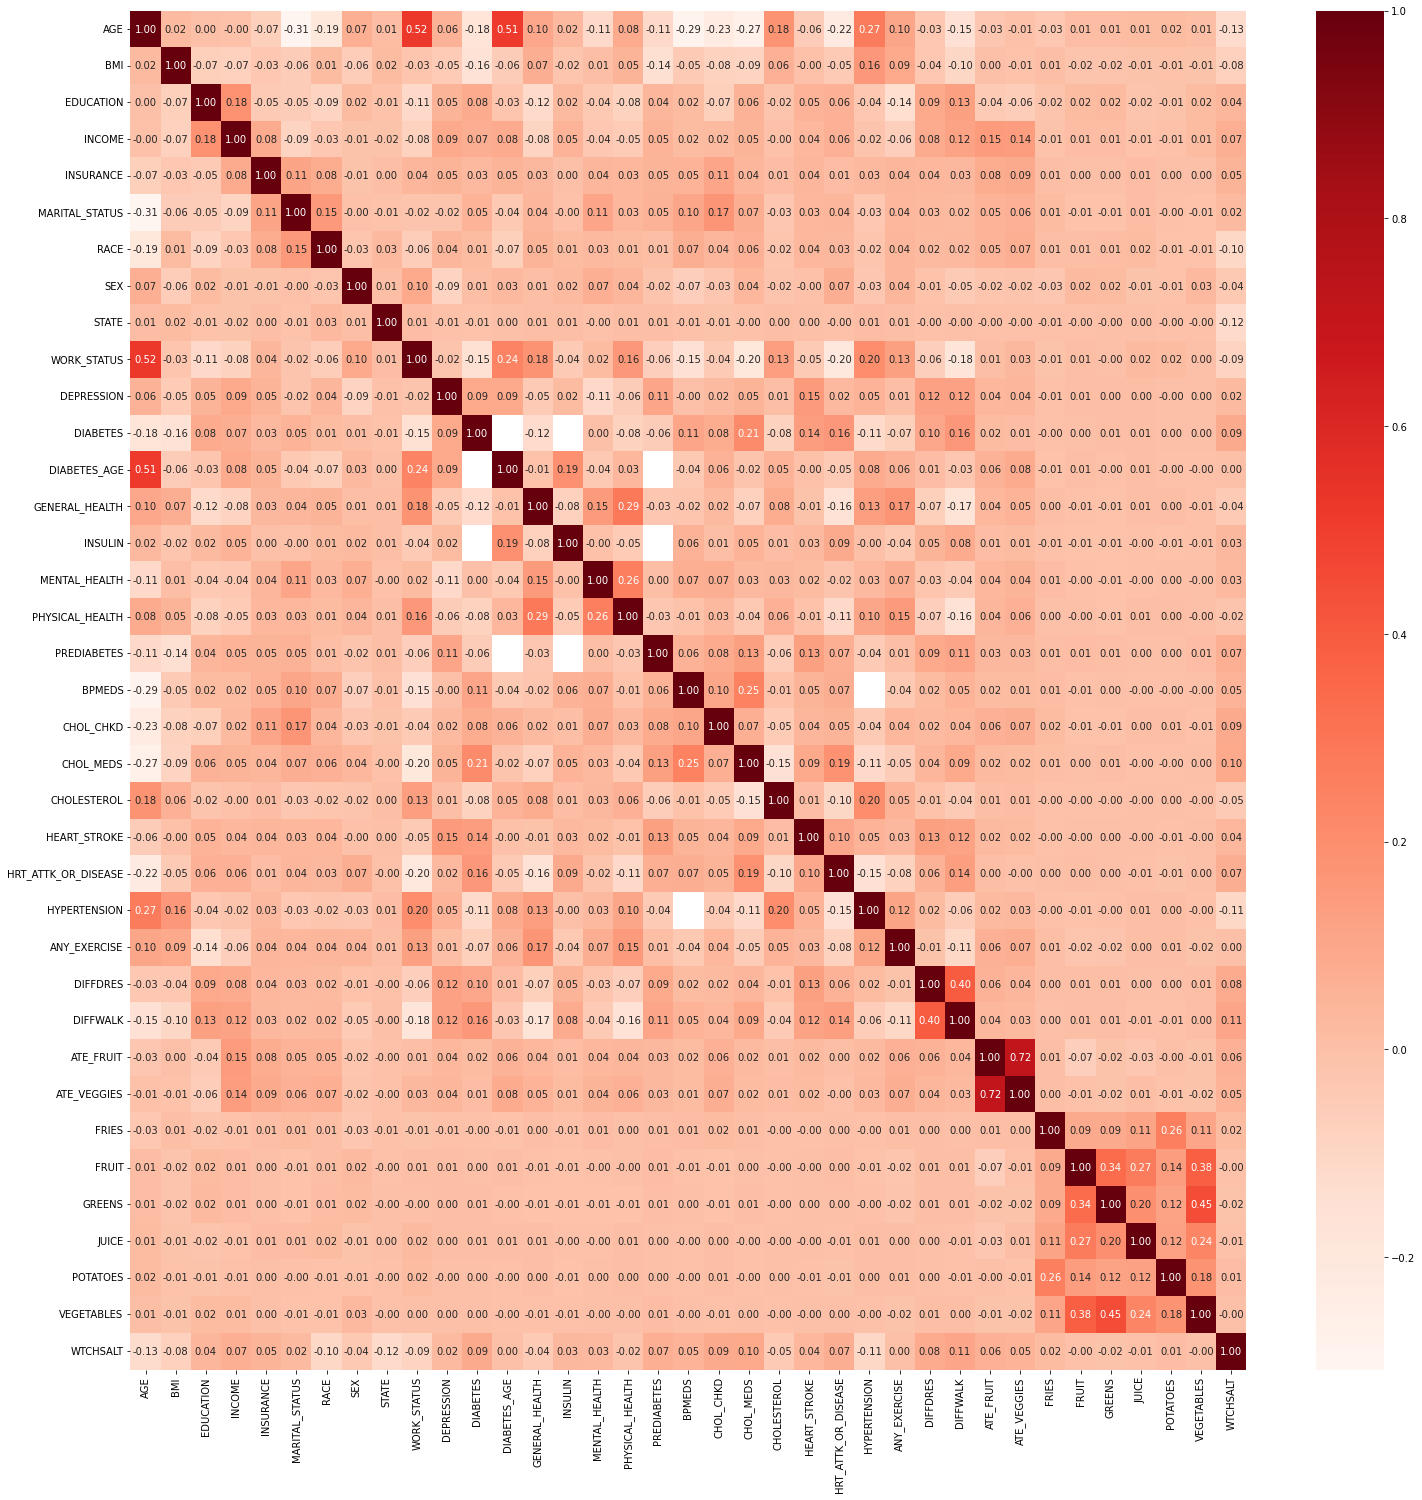

In [18]:
plt.figure(figsize=(25,25))
cor = diet_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [19]:
diet_df.to_csv('diet.csv')